In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
    dataset = pd.read_csv("Classified Data",index_col=0)

In [48]:
dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()

In [51]:
X =sc.fit_transform(dataset.drop(['TARGET CLASS'], axis =1))

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, dataset['TARGET CLASS'], test_size = 0.30, random_state=0)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
kn = KNeighborsClassifier(n_neighbors=1)

In [56]:
kn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [57]:
y_pred = kn.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, accuracy_score

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       140
           1       0.91      0.90      0.90       160

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [60]:
print(accuracy_score(y_test, y_pred))

0.8966666666666666


In [71]:
error=[]

In [72]:
for i in range(1,40):
    kn1 = KNeighborsClassifier(n_neighbors= i)
    kn1.fit(X_train, y_train)
    pred_i = kn1.predict(X_test)
    error.append(np.mean(pred_i != y_test))

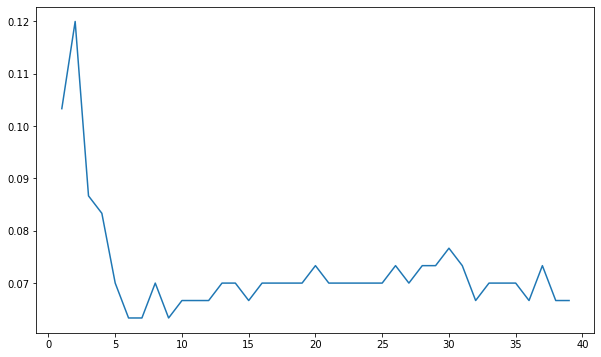

In [73]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error)

In [74]:
kn_final = KNeighborsClassifier(n_neighbors=6)

In [75]:
kn_final.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [76]:
pred_final = kn_final.predict(X_test)

In [77]:
print(classification_report(y_test, pred_final))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       140
           1       0.94      0.94      0.94       160

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

